In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from urllib.parse import urlencode
import requests

from calendar import monthrange
from datetime import timedelta

%matplotlib inline

Загружаем данные

In [2]:
df_url = 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg'
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

# Получаем загрузочную ссылку
df_final_url = base_url + urlencode(dict(public_key=df_url))
response = requests.get(df_final_url)
df_download_url = response.json()['href']

ids = pd.read_csv(df_download_url)

In [3]:
df_url = 'https://disk.yandex.ru/d/0zWmh1bYP6REbw'
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

# Получаем загрузочную ссылку
df_final_url = base_url + urlencode(dict(public_key=df_url))
response = requests.get(df_final_url)
df_download_url = response.json()['href']

orders = pd.read_csv(df_download_url)

In [4]:
df_url = 'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

# Получаем загрузочную ссылку
df_final_url = base_url + urlencode(dict(public_key=df_url))
response = requests.get(df_final_url)
df_download_url = response.json()['href']

products = pd.read_csv(df_download_url)

### Описание данных:


**olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей**  
customer_id — позаказный идентификатор пользователя  
customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)  
customer_zip_code_prefix —  почтовый индекс пользователя  
customer_city —  город доставки пользователя  
customer_state —  штат доставки пользователя  

**olist_orders_dataset.csv —  таблица заказов**    
order_id —  уникальный идентификатор заказа (номер чека)  
customer_id —  позаказный идентификатор пользователя 
order_status —  статус заказа  
order_purchase_timestamp —  время создания заказа  
order_approved_at —  время подтверждения оплаты заказа  
order_delivered_carrier_date —  время передачи заказа в логистическую службу  
order_delivered_customer_date —  время доставки заказа  
order_estimated_delivery_date —  обещанная дата доставки  

**olist_order_items_dataset.csv —  товарные позиции, входящие в заказы**  
order_id —  уникальный идентификатор заказа (номер чека)  
order_item_id —  идентификатор товара внутри одного заказа  
product_id —  ид товара (аналог штрихкода)  
seller_id — ид производителя товара  
shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике  
price —  цена за единицу товара  
freight_value —  вес товара  

### Уникальные идентификаторы пользователей

In [5]:
ids.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Заказы


In [6]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Товарные позиции, входящие в заказы


In [7]:
products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


# Задачи:

### 1. Проанализировать покупки пользователей.
 -Сколько у нас пользователей, которые совершили покупку только один раз?   
 -Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?   
 -По каждому товару определить, в какой день недели товар чаще всего покупается. 

### 2. Провести когортный анализ пользователей и выявить когорту с самым высоким retention на 3й месяц.

### 3. Построить RFM-сегментацию пользователей.

In [8]:
# Объединим датафреймы в один и посмотрим на данные:

In [9]:
dfd = ids.merge(orders, how = 'outer', on = 'customer_id')


In [10]:
full_data = dfd.merge(products, how = 'outer', on = 'order_id')

In [11]:
full_data.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
dtype: object

In [12]:
full_data.shape

(113425, 18)

In [13]:
full_data.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
dtype: int64

In [14]:
full_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


### Проведу предварительное исследование данных и сформулирую, что должно считаться покупкой. 
##### (Т.к. проект учебный, нет ЛПРа, готового уточнить критерии покупки).

In [15]:
# orders.query('order_status == "invoiced"')

# orders['null_a'] = np.where(orders.order_approved_at.isna(), 0, 1)

# orders.query('null_a == "0"').query('order_status == "invoiced"')


### По фактам оплат, статусам заказов и другим имеющимся данным, выявлены следующие тезисы:



1.
При статусе unavailable в заказах нет товарных позиций (NaN). 
Но есть время заказа и время подтверждения оплаты, а также обещанная дата доставки 
(примерно через месяц после заказа, но такие же сроки и у успешных заказов - эстимация везде с запасом, 
хоть и доставляли заказы раньше указанного обещанного срока).

Вероятно, статус unavailable != недоступности товара, а лишь означает, что в базе не хватает данных о заказе.


2.
При статусе заказа delivered есть значения, где в order_approved_at (время подтверждения оплаты заказа) - пусто.
Вероятно, это заказы с оплатой по факту доставки. Нет оснований полагать, что они не состоялись, 
несмотря на отсутствие статуса оплаты.

3.
При статусе created (первый статус после офомления заказа, до оплаты) - сразу есть оценка даты доставки.
Тут еще нет оплаты. Но см. п.2: оплата может не подсветиться даже после доставки.

4.
Статус approved - всего 2 таких заказа, оба с подтвержденной оплатой, ожидают доставку.

5.
Среди canceled есть уже оплатченные заказы (с подтвержденной оплатой), но наверняка оплата возвращена = покупка аннулирована.



В заказах со статусом invoiced (выставлен счёт) смущает, что  уже есть дата подтверждения оплаты - что странно, 
но возможно, это значит, что оплата "только что поступила", но ее еще не апрувнули в системе.


### Итого:
Нельзя сказать, что покупка - это обязательно заказ с не-пустым значением в order_approved_at.
И нельзя сказать, что invoiced - это НЕоплаченные заказы. 
И нельзя сказать, что unavailable - это НЕоплаченные заказы. 

Покупкой буду считать все заказы со статусом != canceled.

# 1. Анализ покупок пользователей.

### Посчитаем пользователей, которые совершили покупку только один раз

In [16]:
# (т.е. нужно посчитать customer_unique_id, по которым есть только один заказ - order_id)

In [17]:
full_data.query('order_status != "canceled"').customer_unique_id.count()

112719

In [18]:
one_order = full_data.query('order_status != "canceled"') \
.groupby('customer_unique_id', as_index = False) \
.agg({'order_id': 'count'}) \
.query('order_id == 1') \
.order_id.value_counts()

one_order

1    83721
Name: order_id, dtype: int64

In [19]:
round(one_order / full_data.query('order_status != "canceled"').order_id.count(), 2)

1    0.74
Name: order_id, dtype: float64

#### 83721 пользователей совершили покупку только один раз (из 112719 неотмененных заказов, что равно 74 процентам).

### Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [20]:
# все статусы заказов.
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [21]:
# Посмотрим, заказы с какими статусами вообще есть с пустым значением по полю даты доставки.

orders['deliv_status'] = np.where(orders.order_delivered_customer_date.isna(), 0, 1)


qq = orders \
.query('deliv_status == "0"')

qq.order_status.unique()



array(['invoiced', 'shipped', 'processing', 'unavailable', 'canceled',
       'delivered', 'created', 'approved'], dtype=object)

In [22]:
# даже со статусом "Доставлено" есть заказы с пустым полем по дате доставки.
# таким образом, "доверять" полю с датой доставки мы не можем.

# зато в поле order_estimated_delivery_date (обещанная дата доставки) нет пропущенных значений 
# + из точно-недоставленных статусов есть статус canceled 
# (за исключением нескольких заказов с имеющейся датой доставки, но отмененных - видимо, во время доставки что-то не устроило)

In [23]:
# переведем столбец order_estimated_delivery_date (обещанная дата доставки) в формат даты.

full_data.order_estimated_delivery_date = pd.to_datetime(full_data.order_estimated_delivery_date)

In [24]:
# добавим столбец в формате год-месяц.

full_data["estimated_delivery_date_year_month"] = full_data["order_estimated_delivery_date"].dt.to_period("M")

In [25]:
# добавляем столбец, который отвечает на вопрос, пустое поле в дате доставки или нет (0 - пусто, 1 - не пусто).

full_data['deliv_status'] = np.where(full_data.order_delivered_customer_date.isna(), 0, 1)


In [26]:
# группируем данные, выводим месяц обещанной даты доставки, статус заказа, количество таких заказов, 
# при условии, что заказ отменен, а также при условии, что в дате доставки пусто.

undelivered_orders = full_data \
.query('deliv_status == "0"') \
.groupby(['estimated_delivery_date_year_month', 'order_status'], as_index = False) \
.agg({'customer_id': 'count'}) \
.query("order_status =='canceled'") \
.rename(columns = {'customer_id': 'amount'})


In [27]:
undelivered_orders.head()

,estimated_delivery_date_year_month,order_status,amount
0,2016-09,canceled,1
1,2016-10,canceled,3
3,2016-11,canceled,10
7,2016-12,canceled,8
12,2017-02,canceled,2


In [28]:
undelivered_orders\
.amount.mean().round()

27.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '2016-09'),
  Text(1, 0, '2016-10'),
  Text(2, 0, '2016-11'),
  Text(3, 0, '2016-12'),
  Text(4, 0, '2017-02'),
  Text(5, 0, '2017-03'),
  Text(6, 0, '2017-04'),
  Text(7, 0, '2017-05'),
  Text(8, 0, '2017-06'),
  Text(9, 0, '2017-07'),
  Text(10, 0, '2017-08'),
  Text(11, 0, '2017-09'),
  Text(12, 0, '2017-10'),
  Text(13, 0, '2017-11'),
  Text(14, 0, '2017-12'),
  Text(15, 0, '2018-01'),
  Text(16, 0, '2018-02'),
  Text(17, 0, '2018-03'),
  Text(18, 0, '2018-04'),
  Text(19, 0, '2018-05'),
  Text(20, 0, '2018-06'),
  Text(21, 0, '2018-07'),
  Text(22, 0, '2018-08'),
  Text(23, 0, '2018-09'),
  Text(24, 0, '2018-10'),
  Text(25, 0, '2018-11')])

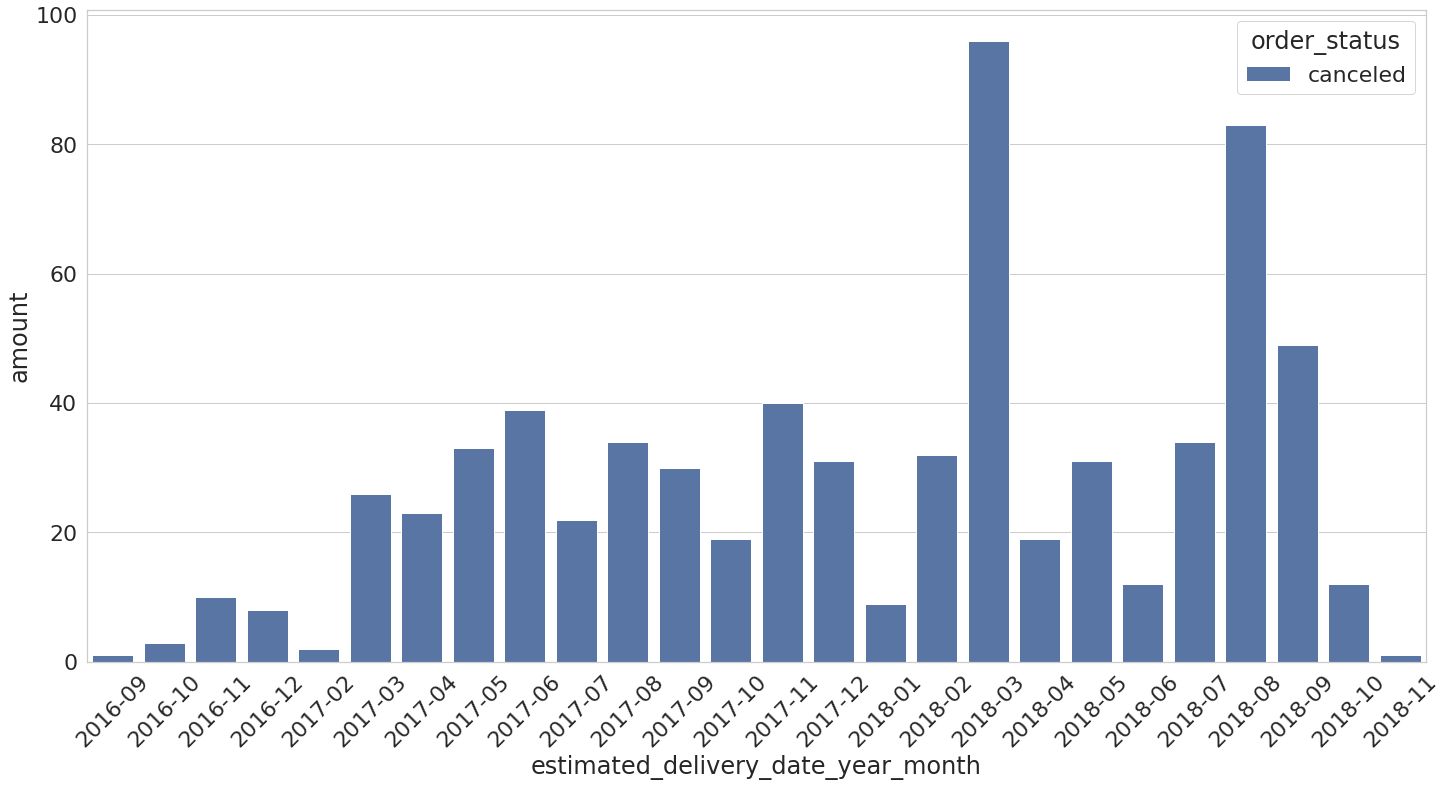

In [29]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(24,12)}
        )


sns.barplot(x=undelivered_orders.estimated_delivery_date_year_month, y=undelivered_orders.amount, hue = undelivered_orders.order_status)
plt.xticks(rotation=45)


#### В среднем в месяц не доставляется 27 заказов по причине отменены, больше всего в марте и августе 2018 года.

#####  *при этом держим в уме, что есть заказы со статусов unavailable, по которым не понятно ни что с доставкой, ни что с заказом в целом.

### В какой день недели чаще всего покупается каждый из товаров?

Ранее мы решили, что покупкой будем считать любой заказ со статусом != canceled.
Но по формулировке задания как будто подразумевается все-таки, в какие дни недели заказы ОФОРМЛЯЮТ.

order_purchase_timestamp  - время создания заказа
order_approved_at -  время подтверждения оплаты заказа


под понятие ОФОРМЛЕНИЕ заказа можно было бы взять более верняковую метрику - дату и время подтверждения оплаты 
(order_approved_at), но т.к.
есть кейсы, где даже при статусе заказа delivered есть значения, 
где в order_approved_at (время подтверждения оплаты заказа) - пусто,

то возьмем за понятие оформления заказа именно время создания заказа (order_purchase_timestamp).


к тому же мы не знаем, 
от чего зависит подтверждение оплаты (возможно, есть временной лаг от момента фактической оплаты до
подтверждения оплаты на стороне магазина, который уже не зависит от покупателя).



товар - product_id 




In [30]:
# добавляем колонку с днями недели от столбца order_purchase_timestamp.

full_data.order_purchase_timestamp = pd.to_datetime(full_data.order_purchase_timestamp)

full_data['purchase_weekday'] = full_data['order_purchase_timestamp'].dt.day_name()

full_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,estimated_delivery_date_year_month,deliv_status,purchase_weekday
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,2017-06,1,Tuesday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,2018-02,1,Friday
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,2018-06,1,Saturday
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-10,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,2018-04,1,Tuesday
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-15,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,2018-08,1,Sunday


In [31]:
full_data.order_status.unique()

array(['delivered', 'canceled', 'invoiced', 'shipped', 'processing',
       'unavailable', 'approved', 'created'], dtype=object)

In [32]:
# прогнав статусы заказа через шаблон:
full_data.query('order_status == "created"').order_status.count()

# видим, что исторические статусы заказа не сохраняются, а "перетираются" актуальным статусом, 
# то есть в столбце статуса хранится последний актуальный статус.
# Значит, опираться на статус 'created' или 'approved' нет смысла, 
# ну и в целом с учетом условия, что нам нужно понять день недели СОЗДАНИЯ заказа (как определили выше),
# не будем тут фильтровать статусы заказа.

5

In [33]:
products_by_weekdays = full_data.groupby(["product_id", "purchase_weekday"], as_index=False) \
    .order_id.nunique() \
    .sort_values("order_id", ascending=False) \
    .groupby("product_id", as_index=False).first() \
    .sort_values("order_id", ascending=False) \
    .rename(columns={"purchase_weekday" : "most_frequent_day", "order_id" : "orders_count"})

products_by_weekdays

,product_id,most_frequent_day,orders_count
19742,99a4788cb24856965c36a24e339b6058,Monday,87
22112,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,75
10867,53b36df67ebb7c41585e8d54d6772e08,Tuesday,70
27039,d1c427060a0f73f6b889a5c7c61f2ac4,Monday,60
8613,422879e10f46682990de24d770e7f83d,Thursday,58
...,...,...,...
12259,5ea3f159c3d1fbcb5f1785dbb9c984e0,Friday,1
12258,5ea3a4fc17bd1341eeea4716d481ccfa,Friday,1
12257,5ea241885816f6957dfaa9a8592c6b37,Wednesday,1
12256,5ea13888505d00f6a33b996f70a06e13,Monday,1


#### С помощью таблицы выше можно по каждому интересующему товару найти день недели с наибольшим кол-вом заказов.
#### Например, для товара 99a4788cb24856965c36a24e339b6058 это Понедельник.

Но также посчитаем значения кол-ва заказов по дням недели в тотале:

In [34]:
full_data \
.groupby('purchase_weekday', as_index = False) \
.agg({'order_id': 'count'}) \
.sort_values('order_id', ascending = False)

,purchase_weekday,order_id
1,Monday,18521
5,Tuesday,18369
6,Wednesday,17727
4,Thursday,16919
0,Friday,16159
3,Sunday,13488
2,Saturday,12242


#### Суммарно больше всего товаров было куплено в Понедельники.


### Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 


In [35]:
# Учтем, что внутри месяца может быть не целое количество недель. 

In [36]:
# понадобятся:

# customer_unique_id —  уникальный идентификатор пользователя (аналог номера паспорта)
# order_id - уникальный идентификатор заказа (номер чека)
# order_purchase_timestamp —  время создания заказа

# # дни в месяце / 7 = кол-во недель 

# возьмем статусы != canceled (НЕ отмененные)

In [37]:
full_data.order_purchase_timestamp = pd.to_datetime(full_data.order_purchase_timestamp).dt.to_period("M")

In [38]:
# фильтруем по статусам заказов: не отмененные,
# группируем данные по уникальным кастомерам и месяцу, считаем кол-во заказов в этом разрезе.

avg_purchases_by_customer = full_data \
.query("order_status not in ['canceled']") \
.groupby(['customer_unique_id', 'order_purchase_timestamp'], as_index = False) \
.agg({'order_id': 'count'})

avg_purchases_by_customer

,customer_unique_id,order_purchase_timestamp,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1
2,0000f46a3911fa3c0805444483337064,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1
...,...,...,...
97455,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,2
97456,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1
97457,ffff371b4d645b6ecea244b27531430a,2017-02,1
97458,ffff5962728ec6157033ef9805bacc48,2018-05,1


In [39]:
# добавляем столбец с кол-вом дней в месяце:

avg_purchases_by_customer['days_in_month_count'] = avg_purchases_by_customer.order_purchase_timestamp.dt.days_in_month

In [40]:
# добавляем столбец с кол-вом недель в месяце:

avg_purchases_by_customer['order_purchase_weeks_count'] = avg_purchases_by_customer.days_in_month_count / 7

In [41]:
# Данные за сентябрь 2016 и за сентябрь 2018 (первый и последний месяцы) - неполные.
# Уберем их из датасета.

avg_purchases_by_customer = avg_purchases_by_customer \
.query('"2016-09" < order_purchase_timestamp < "2018-09"') \
.sort_values('order_purchase_timestamp')

In [42]:
# добавляем столбец со средним значением кол-ва заказов (покупок) в неделю по месяцам:

avg_purchases_by_customer['avg_purchases_per_week'] = round(avg_purchases_by_customer.order_id / avg_purchases_by_customer.order_purchase_weeks_count, 2)

In [43]:
avg_purchases_by_customer.head()

,customer_unique_id,order_purchase_timestamp,order_id,days_in_month_count,order_purchase_weeks_count,avg_purchases_per_week
44097,7390ed59fa1febbfda31a80b4318c8cb,2016-10,1,31,4.428571,0.23
5110,0d527a050dc34913c5c4746cefae5995,2016-10,1,31,4.428571,0.23
16428,2b18ce67b0eecc6b8f099bfdaabf545b,2016-10,1,31,4.428571,0.23
67973,b2272a60af3b7f5afe04c6cbf1dcfb15,2016-10,1,31,4.428571,0.23
44890,75b181fe0ef694c753c72540c0fdd389,2016-10,1,31,4.428571,0.23


In [44]:
avg_purchases_by_customer_pivot = avg_purchases_by_customer \
.pivot(index = 'customer_unique_id', columns = 'order_purchase_timestamp', values = 'avg_purchases_per_week') \
.fillna('-')

avg_purchases_by_customer_pivot

order_purchase_timestamp,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,0.23,-,-,-
0000b849f77a49e4a4ce2b2a4ca5be3f,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,0.23,-,-,-
0000f46a3911fa3c0805444483337064,-,-,-,-,0.23,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
0000f6ccb0745a6a4b88665a16c9f078,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
0004aac84e0df4da2b147fca70cf8255,-,-,-,-,-,-,-,-,-,-,...,0.23,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,-,-,-,-,-,-,-,0.47,-,-,...,-,-,-,-,-,-,-,-,-,-
fffea47cd6d3cc0a88bd621562a9d061,-,-,-,-,-,-,-,-,-,-,...,-,0.23,-,-,-,-,-,-,-,-
ffff371b4d645b6ecea244b27531430a,-,-,-,0.25,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [45]:
avg_purchases_by_customer.avg_purchases_per_week.describe()

count    97457.000000
mean         0.267597
std          0.131025
min          0.230000
25%          0.230000
50%          0.230000
75%          0.230000
max          5.420000
Name: avg_purchases_per_week, dtype: float64

#### В среднем по пользователям, заказы которых не отменены, среднее значение заказов в неделю = 0.27.
#### Распределение значений среднего кол-ва покупок (заказов) в неделю по месяцам на каждого пользователя - в сводной таблице выше (avg_purchases_by_customer_pivot).

# 2. Когортный анализ пользователей. 
### Выявим когорту с самым высоким retention на 3й месяц. 


In [46]:
full_data.order_purchase_timestamp.sort_values().unique()

<PeriodArray>
['2016-09', '2016-10', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
 '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11',
 '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
 '2018-07', '2018-08', '2018-09', '2018-10']
Length: 25, dtype: period[M]

In [47]:
# у нас есть данные за 2016, 2017 и 2018 годы, но все 12 месяцев есть только по 2017 году.
# когорты 2017 года и будем анализировать.

# Понадобятся:
# order_purchase_timestamp - время создания заказа (год и месяц, отфильтровать только по 2017)
# customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

# надо выявить retention на 3й месяц - долю вернувшихся (сделавших новый заказ) на 3й месяц,
# отсчитывая от отправной точки - заказа конкретного месяца.



In [48]:
# Вычленяем только первые заказы по пользователям. 
# При этом не убираем отмененные (canceled) заказы, т.к. фактор отмены (скорее даже ее причины) может влиять не retention. 


first_orders = full_data \
.groupby('customer_unique_id', as_index = False) \
.agg({'order_purchase_timestamp': 'min'}) \
.rename(columns = {'order_purchase_timestamp': 'first_order'})


first_orders.head()

,customer_unique_id,first_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11


In [49]:
# Формируем данные о размерах когорт

first_orders_group = first_orders.groupby('first_order', as_index=False) \
    .customer_unique_id.nunique() \
    .sort_values("first_order") \
    .rename(columns={"customer_unique_id" : "cohort_sizes"})

first_orders_group.head()

,first_order,cohort_sizes
0,2016-09,4
1,2016-10,321
2,2016-12,1
3,2017-01,764
4,2017-02,1752


In [50]:
# Для каждого пользователя добавляем информацию о его принадлежности к когорте и её размерах

info_groups = first_orders.merge(first_orders_group, on='first_order', how='left')

info_groups.head()

,customer_unique_id,first_order,cohort_sizes
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,6622
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,6622
2,0000f46a3911fa3c0805444483337064,2017-03,2636
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4470
4,0004aac84e0df4da2b147fca70cf8255,2017-11,7304


In [51]:
# Добавляем данные о когортах в объеденную таблицу из трех датафреймов

orders_merged = full_data.merge(info_groups, how='left', on='customer_unique_id')

In [52]:
orders_merged.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_id,seller_id,shipping_limit_date,price,freight_value,estimated_delivery_date_year_month,deliv_status,purchase_weekday,first_order,cohort_sizes
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05,2017-05-16 15:22:12,2017-05-23 10:47:57,...,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,2017-06,1,Tuesday,2017-05,3596
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01,2018-01-12 20:58:32,2018-01-15 17:14:59,...,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,2018-02,1,Friday,2018-01,7025
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05,2018-05-20 16:19:10,2018-06-11 14:31:00,...,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,2018-06,1,Saturday,2018-05,6622
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03,2018-03-13 17:29:19,2018-03-27 23:22:42,...,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,2018-04,1,Tuesday,2018-03,6965
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07,2018-07-29 10:10:09,2018-07-30 15:16:00,...,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,2018-08,1,Sunday,2018-07,6071


In [53]:
# Отставляем только 2017 год в первых заказах.
# В рамках когортного анализа считаем Retention rate для каждой когорты помесячно.

cohorts = orders_merged.query("first_order >= '2017-01' and first_order <= '2017-12'") \
.groupby(['first_order','order_purchase_timestamp', 'cohort_sizes'], as_index=False) \
.customer_unique_id.nunique()


cohorts.head()

,first_order,order_purchase_timestamp,cohort_sizes,customer_unique_id
0,2017-01,2017-01,764,764
1,2017-01,2017-02,764,3
2,2017-01,2017-03,764,2
3,2017-01,2017-04,764,1
4,2017-01,2017-05,764,3


In [54]:
cohorts["retention_rate"] = cohorts.customer_unique_id / cohorts.cohort_sizes

cohorts.head()

,first_order,order_purchase_timestamp,cohort_sizes,customer_unique_id,retention_rate
0,2017-01,2017-01,764,764,1.000000
1,2017-01,2017-02,764,3,0.003927
2,2017-01,2017-03,764,2,0.002618
3,2017-01,2017-04,764,1,0.001309
4,2017-01,2017-05,764,3,0.003927


In [55]:
# Переворачиваем датасет с когортным анализом в сводную для дальнейшей визуализации через Heatmap

cohorts_pivot = cohorts.pivot(index='first_order', columns='order_purchase_timestamp', values='retention_rate')

cohorts_pivot

order_purchase_timestamp,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
first_order,,,,,,,,,,,,,,,,,,,,
2017-01,1.0,0.003927,0.002618,0.001309,0.003927,0.001309,0.005236,0.001309,0.001309,NaN,0.003927,0.001309,0.007853,0.003927,0.001309,0.001309,0.002618,0.003927,NaN,0.001309
2017-02,NaN,1.000000,0.002283,0.002854,0.001142,0.003995,0.001142,0.002283,0.001712,0.001712,0.002283,0.001142,0.002854,0.001712,0.001712,0.001142,0.000571,0.000571,0.002283,NaN
2017-03,NaN,NaN,1.000000,0.004932,0.003794,0.003794,0.003414,0.001517,0.001517,0.003035,0.003414,0.000759,0.003794,0.001517,0.002276,0.001138,0.001517,0.002276,0.000759,0.001517
2017-04,NaN,NaN,NaN,1.000000,0.005952,0.002126,0.001701,0.003401,0.002551,0.003401,0.002976,0.002976,0.001701,0.002551,0.000850,0.000850,0.000425,0.000850,0.000850,0.002126
2017-05,NaN,NaN,NaN,NaN,1.000000,0.005006,0.005006,0.003893,0.003059,0.003337,0.004171,0.001669,0.002503,0.003059,0.002503,0.003337,0.002503,0.000278,0.001947,0.002503
2017-06,NaN,NaN,NaN,NaN,NaN,1.000000,0.004779,0.003504,0.004141,0.002549,0.003823,0.003823,0.002230,0.001274,0.002230,0.003186,0.003504,0.001593,0.001274,0.001911
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.005136,0.003595,0.002568,0.002825,0.002054,0.003082,0.001027,0.001798,0.002568,0.002311,0.003082,0.001284,0.002568
2017-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.006931,0.003346,0.002629,0.003585,0.005258,0.002868,0.002629,0.001434,0.001434,0.002390,0.001912,0.000956
2017-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.006780,0.005327,0.002906,0.004600,0.002179,0.002179,0.002421,0.002906,0.001695,0.002663,0.000726


In [56]:
# функция для выделения нужной диагонали (3й месяц):


def style_diag(df_: pd.DataFrame, offset: int = 0) -> pd.DataFrame:
    # Create empty styles DataFrame
    style_df = pd.DataFrame('', index=df_.index, columns=df_.columns)

    # Create a 2D False mask
    mask = np.zeros(df_.shape, dtype=bool)

    # Find diagonal indices at an offset and replace values with True
    rows, cols = np.indices(mask.shape)
    mask[np.diag(rows, k=offset), np.diag(cols, k=offset)] = True

    # Set diagonal styles using mask
    style_df[mask] = 'background-color:yellow'
    return style_df



In [57]:
# Таблица с когортами с выделенной нужной диагональю:

cochorts_retention_hm = (cohorts_pivot
            .style
            .set_caption('User retention by cohort')  # добавляем подпись
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep="")  # числа форматируем как проценты, NaN заменяем на пустоту
            .apply(style_diag, offset=2, axis=None)
            )

cochorts_retention_hm

order_purchase_timestamp,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
first_order,,,,,,,,,,,,,,,,,,,,
2017-01,100.00%,0.39%,0.26%,0.13%,0.39%,0.13%,0.52%,0.13%,0.13%,,0.39%,0.13%,0.79%,0.39%,0.13%,0.13%,0.26%,0.39%,,0.13%
2017-02,,100.00%,0.23%,0.29%,0.11%,0.40%,0.11%,0.23%,0.17%,0.17%,0.23%,0.11%,0.29%,0.17%,0.17%,0.11%,0.06%,0.06%,0.23%,
2017-03,,,100.00%,0.49%,0.38%,0.38%,0.34%,0.15%,0.15%,0.30%,0.34%,0.08%,0.38%,0.15%,0.23%,0.11%,0.15%,0.23%,0.08%,0.15%
2017-04,,,,100.00%,0.60%,0.21%,0.17%,0.34%,0.26%,0.34%,0.30%,0.30%,0.17%,0.26%,0.09%,0.09%,0.04%,0.09%,0.09%,0.21%
2017-05,,,,,100.00%,0.50%,0.50%,0.39%,0.31%,0.33%,0.42%,0.17%,0.25%,0.31%,0.25%,0.33%,0.25%,0.03%,0.19%,0.25%
2017-06,,,,,,100.00%,0.48%,0.35%,0.41%,0.25%,0.38%,0.38%,0.22%,0.13%,0.22%,0.32%,0.35%,0.16%,0.13%,0.19%
2017-07,,,,,,,100.00%,0.51%,0.36%,0.26%,0.28%,0.21%,0.31%,0.10%,0.18%,0.26%,0.23%,0.31%,0.13%,0.26%
2017-08,,,,,,,,100.00%,0.69%,0.33%,0.26%,0.36%,0.53%,0.29%,0.26%,0.14%,0.14%,0.24%,0.19%,0.10%
2017-09,,,,,,,,,100.00%,0.68%,0.53%,0.29%,0.46%,0.22%,0.22%,0.24%,0.29%,0.17%,0.27%,0.07%


### Когорта с самым высоким retention на 3й месяц: 2017-09 (сентябрь):  0,53% .

# 3. RFM-сегментация пользователей.

**R**ecency - оценка времени от последней успешной покупки пользователя до текущей даты.  
Чем меньше дней прошло от покупки, тем выше оценка. Ранжируем по степени давности:

*1 - очень давно*  
*2 - давненько*  
*3 - недавно*  
*4 - "на днях"*


**F**requency - оценка суммарного количества покупок пользователя за всё время.  
Чем больше покупок, тем выше оценка.

*1 - разовые*  
*2 - редкие*  
*3 - частые*  
*4 - постоянные*

**M**onetary value - оценка суммы покупок за всё время.  
Чем больше сумма покупок, тем выше оценка.

*1 - эконом*  
*2 - средние*  
*3 - прибыльные*  
*4 - топ*

In [58]:
# Уберем из df отмененнные заказы.
data_purchases = full_data.query('order_status != "canceled"')

In [59]:
# создадим новый df, где оставим только нужные колонки: customer_unique_id', 'order_purchase_timestamp', 'order_id'
# и посчитаем сумму каждого заказа.

sales_per_order = data_purchases \
.groupby(['customer_unique_id', 'order_purchase_timestamp', 'order_id'], as_index = False) \
.agg({'price': 'sum'}) \
.rename(columns = {'price': 'order_sum'})

In [60]:
sales_per_order.head()

,customer_unique_id,order_purchase_timestamp,order_id,order_sum
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,e22acc9c116caa3f2b7121bbb380d08e,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,3594e05a005ac4d06a72673270ef9ec9,18.90
2,0000f46a3911fa3c0805444483337064,2017-03,b33ec3b699337181488304f362a6b734,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,41272756ecddd9a9ed0180413cc22fb6,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11,d957021f1127559cd947b62533f484f7,180.00


In [61]:
# применим костыль к датам, чтобы смочь производить с ними дальнейшие операции.

sales_per_order.order_purchase_timestamp = sales_per_order.order_purchase_timestamp.astype(str)
sales_per_order.order_purchase_timestamp = pd.to_datetime(sales_per_order.order_purchase_timestamp)

In [62]:
# Найдем последний день в датасете и будем считать, что это "сегодня" (чтобы не оперировать большими разницами в датах).

now = sales_per_order \
.order_purchase_timestamp.max()

now

Timestamp('2018-09-01 00:00:00')

In [63]:
# Создаем df с давностью последнего заказа, частотой (кол-вом) покупок, суммой покупок - на юзера.

RFM_table=sales_per_order \
.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x: (now - x.max()), # Recency
                                                'order_id': lambda x: len(x.unique()), # Frequency
                                                'order_sum': lambda x: x.sum()})    # Monetary 



RFM_table.rename(columns={'order_purchase_timestamp': 'recency', 
                         'order_id': 'frequency',
                         'order_sum': 'monetary_value'}, inplace=True)




In [64]:
RFM_table.head()

,recency,frequency,monetary_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,123 days,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,123 days,1,18.90
0000f46a3911fa3c0805444483337064,549 days,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,335 days,1,25.99
0004aac84e0df4da2b147fca70cf8255,304 days,1,180.00


In [65]:
RFM_table.dtypes

recency           timedelta64[ns]
frequency                   int64
monetary_value            float64
dtype: object

In [66]:
# Переведем столбец recency в число (без "days"):


RFM_table.recency = RFM_table.recency.astype("timedelta64[D]")

RFM_table.head()

,recency,frequency,monetary_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,123.0,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,123.0,1,18.90
0000f46a3911fa3c0805444483337064,549.0,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,335.0,1,25.99
0004aac84e0df4da2b147fca70cf8255,304.0,1,180.00


In [67]:
RFM_table.describe()

,recency,frequency,monetary_value
count,95560.000000,95560.000000,95560.000000
mean,256.434596,1.034073,141.234915
std,153.338408,0.212154,215.728209
min,0.000000,1.000000,0.000000
25%,123.000000,1.000000,46.400000
50%,243.000000,1.000000,89.000000
75%,365.000000,1.000000,154.000000
max,730.000000,17.000000,13440.000000


In [68]:
RFM_table.median()

recency           243.0
frequency           1.0
monetary_value     89.0
dtype: float64

In [69]:
RFM_table.quantile(q=[0.25,0.5,0.75])

,recency,frequency,monetary_value
0.25,123.0,1.0,46.4
0.50,243.0,1.0,89.0
0.75,365.0,1.0,154.0


**На основе описательной статистики и данных по квантилям выше думаю, будет ок для recency и monetary_value взять сегментацию по квантилям, а для frequency применим "ручную" сегментацию: подавляющее большинство пользователей сделали по одному заказу, довольно небольшая доля пользователей, которые сделали 4+ заказов, 4+ объединим в одну группу. 3 заказа у нас считается уже частыми покупками.**


In [70]:
# Считаем квантили для recency и monetary_value - составление четырех равных частей на основе доступных значений — для 
# дальнешего расчета показателей RFM.

quantiles = RFM_table.iloc[:, [0, 2]].quantile(q=[0.25,0.5,0.75])

quantiles

,recency,monetary_value
0.25,123.0,46.4
0.50,243.0,89.0
0.75,365.0,154.0


In [71]:
# Конвертируем эти квантили в словарь.

quantiles = quantiles.to_dict()

quantiles

{'recency': {0.25: 123.0, 0.5: 243.0, 0.75: 365.0},
 'monetary_value': {0.25: 46.4, 0.5: 89.0, 0.75: 154.0}}

In [72]:
# Для frequency задаем другие границы.

f_bins_borders = [0, 1, 2, 3, 18]
f_range_names = [1, 2, 3, 4]

In [73]:
# создаем копию таблицы, в ней будем работать далее.

RFM_Segment = RFM_table.copy()

In [74]:
# Добавляем столбец с Frequency:

RFM_Segment['F'] = pd.cut(RFM_Segment.frequency, bins = f_bins_borders, labels = f_range_names)

In [75]:
# Добавляем столбцs с Recency и Monetary_value:


# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    


def M_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
RFM_Segment['R'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles,))
RFM_Segment['M'] = RFM_Segment['monetary_value'].apply(M_Class, args=('monetary_value',quantiles,))


In [76]:
RFM_Segment.dtypes

recency            float64
frequency            int64
monetary_value     float64
F                 category
R                    int64
M                    int64
dtype: object

In [77]:
# Собираем столбец RFM, предварительно переведя F из category в int:

RFM_Segment.F = RFM_Segment.F.astype(int)


RFM_Segment['RFMClass'] = RFM_Segment.R.map(str) \
                            + RFM_Segment.F.map(str) \
                            + RFM_Segment.M.map(str)

### Результирующая таблица с классификацией клиентов в столбце "RFMClass":


In [78]:
RFM_Segment

,recency,frequency,monetary_value,F,R,M,RFMClass
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,123.0,1,129.90,1,4,3,413
0000b849f77a49e4a4ce2b2a4ca5be3f,123.0,1,18.90,1,4,1,411
0000f46a3911fa3c0805444483337064,549.0,1,69.00,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,335.0,1,25.99,1,2,1,211
0004aac84e0df4da2b147fca70cf8255,304.0,1,180.00,1,2,4,214
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,457.0,1,1570.00,1,1,4,114
fffea47cd6d3cc0a88bd621562a9d061,274.0,1,64.89,1,2,2,212
ffff371b4d645b6ecea244b27531430a,577.0,1,89.90,1,1,3,113


### Кто наши лучшие, наиболее ценные клиенты?


In [79]:
#RFMClass = 444

RFM_Segment[RFM_Segment['RFMClass']=='444'].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,F,R,M,RFMClass
customer_unique_id,,,,,,,
c8460e4251689ba205045f3ea17884a1,31.0,4,4080.00,4,4,4,444
4facc2e6fbc2bffab2fea92d2b4aa7e4,31.0,4,1686.90,4,4,4,444
397b44d5bb99eabf54ea9c2b41ebb905,92.0,4,1650.00,4,4,4,444
fe81bb32c243a86b2f86fbf053fe6140,92.0,5,1535.40,4,4,4,444
08e5b38d7948d37fbb2a59fc5e175ab1,123.0,4,866.79,4,4,4,444


### Какие клиенты находятся на пороге оттока? (давно не возвращались, при этом были высокие чеки)


In [80]:
RFM_Segment[RFM_Segment['R'] <= 2 ].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,F,R,M,RFMClass
customer_unique_id,,,,,,,
0a0a92112bd4c708ca5fde585afaa872,365.0,1,13440.0,1,2,4,214
da122df9eeddfedc1dc1f5349a1a690c,518.0,2,7388.0,2,1,4,124
dc4802a71eae9be1dd28f5d788ceb526,577.0,1,6735.0,1,1,4,114
ff4159b92c40ebe40454e3e6a7c35ed6,488.0,1,6499.0,1,1,4,114
4007669dec559734d6f53e029e360987,304.0,1,5934.6,1,2,4,214


### Лояльные клиенты (высокий frequency value)


In [81]:
RFM_Segment[RFM_Segment['F'] == 4 ].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,F,R,M,RFMClass
customer_unique_id,,,,,,,
c8460e4251689ba205045f3ea17884a1,31.0,4,4080.0,4,4,4,444
4facc2e6fbc2bffab2fea92d2b4aa7e4,31.0,4,1686.9,4,4,4,444
397b44d5bb99eabf54ea9c2b41ebb905,92.0,4,1650.0,4,4,4,444
fe81bb32c243a86b2f86fbf053fe6140,92.0,5,1535.4,4,4,4,444
f34cd7fd85a1f8baff886edf09567be3,365.0,4,1047.0,4,2,4,244


In [82]:
# Добавим столбец с интерпретацией сегментов:

def assign_segment(row): 
    rfm = row['RFMClass']
    if rfm == '444':
        return 'Лучшие!' 
    elif rfm[0] == '4' and rfm[1] == '1' and rfm[2] >= '3':
        return 'Новые с потенциалом' 
    elif rfm == '111':
        return 'Пропащие' 
    elif rfm[0] <= '2':
        return 'На пороге оттока' 
    elif rfm[1] == '4':
        return 'Лояльные, но можно поднажать' 
    elif rfm[2] == '4':
        return 'Высокие чеки'
    elif rfm[0] == '1' and rfm[1] == '4': 
        return 'Спящие'
    elif rfm[1] >= '3' and rfm[2] == '1': 
        return 'Частые покупки по мелочи'
    elif rfm[0] >= '3' and rfm[1] >= '2': 
        return 'Недавно покупали не впервые, еще не лояльные'
    elif rfm[1] == '1'and rfm[2] < '3': 
        return 'Покупали всего раз на небольшие чеки'
    else:
        return 'Другие'

RFM_Segment['Segment'] = RFM_Segment.apply(assign_segment, axis=1) 


In [83]:
RFM_Segment.head()

,recency,frequency,monetary_value,F,R,M,RFMClass,Segment
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,123.0,1,129.90,1,4,3,413,Новые с потенциалом
0000b849f77a49e4a4ce2b2a4ca5be3f,123.0,1,18.90,1,4,1,411,Покупали всего раз на небольшие чеки
0000f46a3911fa3c0805444483337064,549.0,1,69.00,1,1,2,112,На пороге оттока
0000f6ccb0745a6a4b88665a16c9f078,335.0,1,25.99,1,2,1,211,На пороге оттока
0004aac84e0df4da2b147fca70cf8255,304.0,1,180.00,1,2,4,214,На пороге оттока


In [84]:
# Визуализируем распределение сегментов:

In [85]:
segments_volume = RFM_Segment.groupby('Segment', as_index = False) \
.agg({'RFMClass': 'count'}, ) \
.rename(columns = {"RFMClass": "Users"}) \
.sort_values('Users', ascending = False)


segments_volume['Percentage'] = round((segments_volume.Users / segments_volume.Users.sum() * 100), 2)
segments_volume

,Segment,Users,Percentage
4,На пороге оттока,37364,39.10
7,Покупали всего раз на небольшие чеки,25689,26.88
6,Новые с потенциалом,12129,12.69
0,Высокие чеки,7265,7.60
1,Другие,6693,7.00
8,Пропащие,5723,5.99
5,"Недавно покупали не впервые, еще не лояльные",658,0.69
3,Лучшие!,25,0.03
2,"Лояльные, но можно поднажать",14,0.01


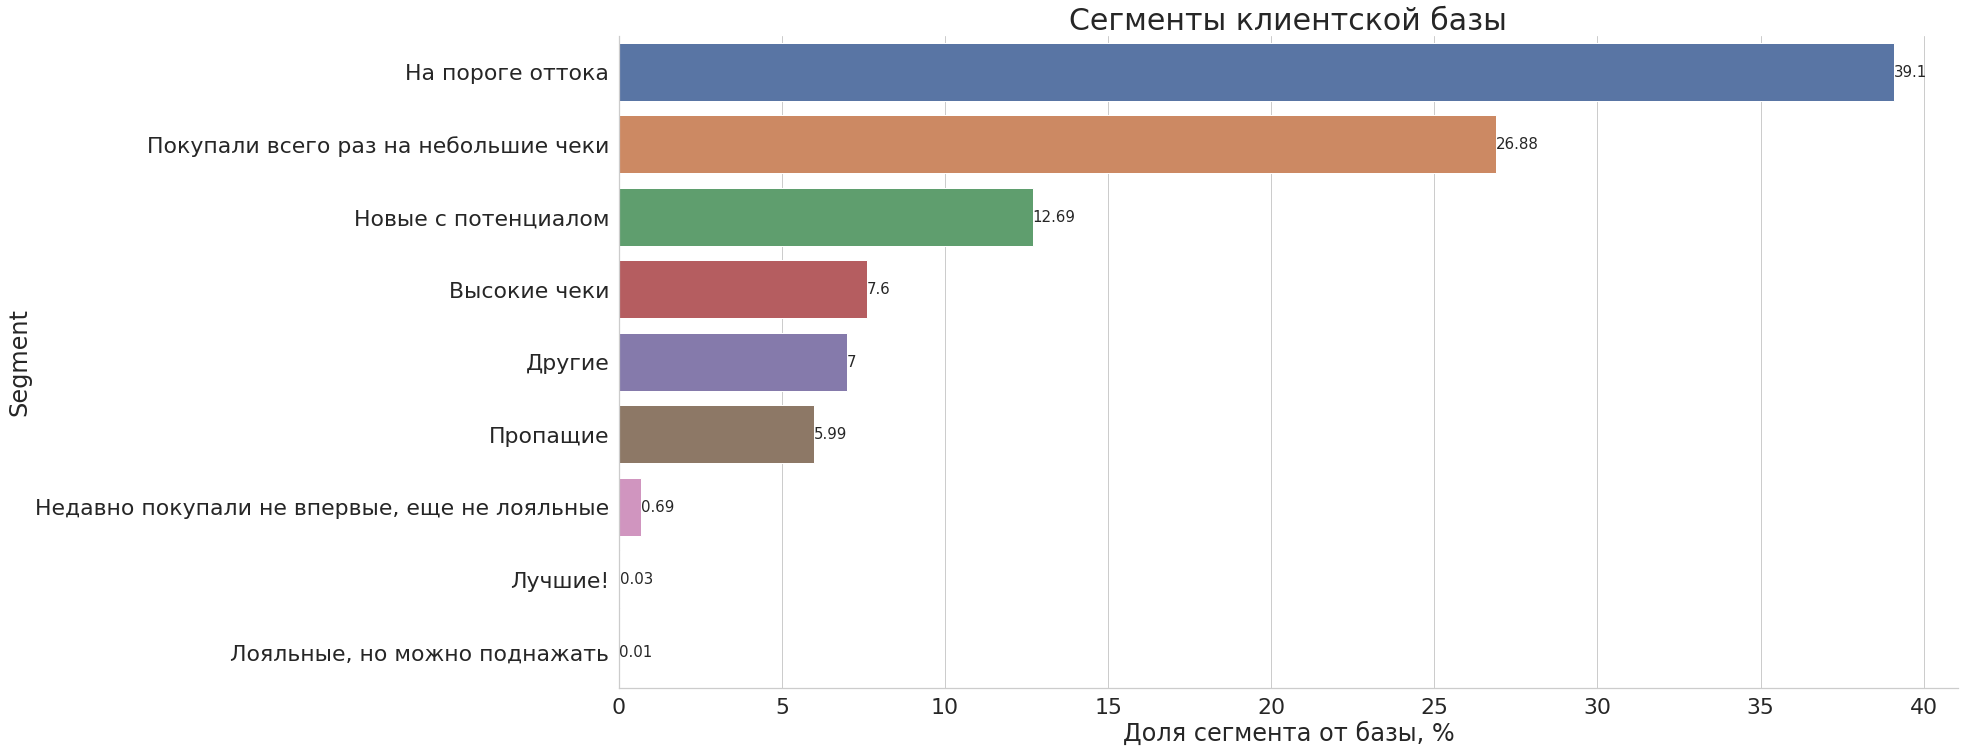

In [86]:
ax = sns.barplot(data=segments_volume, x = 'Percentage', y = 'Segment')

ax.bar_label(ax.containers[0], fontsize=15);

ax.set_xlabel('Доля сегмента от базы, %')
ax.set_title('Сегменты клиентской базы', fontsize=30)
sns.despine()  # убрать часть рамки графика
plt.show()

### Результаты для нашего интернет-магазина неутешительные:

**Больше половины базы совершали покупки давно, редко и на небольшие суммы. 39% находятся на пороге оттока.
Новых клиентов с потенциалом всего 13%, а лояльных и постоянных - всего 0.04% (39 пользователей).**

